In [11]:
pip install xgboost --find-links https://storage.googleapis.com/tf-examples/xgboost/

Looking in links: https://storage.googleapis.com/tf-examples/xgboost/
  Using cached xgboost-2.1.1-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-2.1.1-py3-none-win_amd64.whl (124.9 MB)
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install git+https://github.com/dmlc/xgboost.git


  Cloning https://github.com/dmlc/xgboost.git to c:\users\welcome\appdata\local\temp\pip-req-build-a38kvdck
  Resolved https://github.com/dmlc/xgboost.git to commit de00e07087565cfd6dadceef45dd6b08de324773
Note: you may need to restart the kernel to use updated packages.


  Running command git clone --filter=blob:none --quiet https://github.com/dmlc/xgboost.git 'C:\Users\welcome\AppData\Local\Temp\pip-req-build-a38kvdck'
  Running command git submodule update --init --recursive -q
ERROR: git+https://github.com/dmlc/xgboost.git does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


In [13]:
pip install path/to/downloaded/xgboost.whl

Note: you may need to restart the kernel to use updated packages.


ERROR: xgboost.whl is not a valid wheel filename.


In [1]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [1]:
# Import necessary libraries
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

In [3]:
# Load the datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
# Explore the dimensions of the datasets
print("Training data shape: ", train.shape)
print("Test data shape: ", test.shape)

Training data shape:  (61878, 95)
Test data shape:  (144368, 94)


In [7]:
# Preview the first few rows
print(train.head())
print(test.head())

   id  feat_1  feat_2  feat_3  feat_4  feat_5  feat_6  feat_7  feat_8  feat_9  \
0   1       1       0       0       0       0       0       0       0       0   
1   2       0       0       0       0       0       0       0       1       0   
2   3       0       0       0       0       0       0       0       1       0   
3   4       1       0       0       1       6       1       5       0       0   
4   5       0       0       0       0       0       0       0       0       0   

   ...  feat_85  feat_86  feat_87  feat_88  feat_89  feat_90  feat_91  \
0  ...        1        0        0        0        0        0        0   
1  ...        0        0        0        0        0        0        0   
2  ...        0        0        0        0        0        0        0   
3  ...        0        1        2        0        0        0        0   
4  ...        1        0        0        0        0        1        0   

   feat_92  feat_93   target  
0        0        0  Class_1  
1        0  

In [9]:
# Drop the ID column as it's not useful for the model
train.drop(columns='id', inplace=True)
test.drop(columns='id', inplace=True)

In [11]:
# Extract labels (target) and remove the label column from training data
y = train['target'].str.replace('Class_', '').astype(int) - 1
X = train.drop(columns='target')

In [13]:
# Split training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Convert the datasets to DMatrix format (optimized for XGBoost)
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(test)

In [17]:
# Define the XGBoost parameters
params = {
    'objective': 'multi:softprob',  # For multiclass classification
    'eval_metric': 'mlogloss',      # Log loss as evaluation metric
    'num_class': len(y.unique()),   # Number of unique classes
    'max_depth': 6,                 # Maximum depth of the trees
    'eta': 0.3,                     # Learning rate
    'seed': 42
}

In [21]:
# Perform cross-validation to evaluate the model
cv_results = xgb.cv(
    params=params,
    dtrain=dtrain,
    num_boost_round=50,
    nfold=3,
    metrics='mlogloss',
    early_stopping_rounds=10,
    as_pandas=True
)
print(cv_results)

    train-mlogloss-mean  train-mlogloss-std  test-mlogloss-mean  \
0              1.540384            0.001652            1.558551   
1              1.282073            0.001630            1.309599   
2              1.111848            0.002226            1.146762   
3              0.991148            0.001730            1.032936   
4              0.899610            0.003559            0.946934   
5              0.828884            0.002663            0.881857   
6              0.772279            0.002106            0.830580   
7              0.723821            0.002348            0.787373   
8              0.685457            0.002125            0.753635   
9              0.653811            0.002821            0.726500   
10             0.627133            0.002306            0.704208   
11             0.603159            0.002046            0.684933   
12             0.582784            0.002269            0.668463   
13             0.565031            0.001791            0.65426

In [22]:
# Train the XGBoost model
bst = xgb.train(params=params, dtrain=dtrain, num_boost_round=cv_results.shape[0])

In [25]:
# Make predictions on the validation set
y_pred_val = bst.predict(dval)
val_logloss = log_loss(y_val, y_pred_val)
print(f"Validation Log Loss: {val_logloss}")

Validation Log Loss: 0.5114353815093792


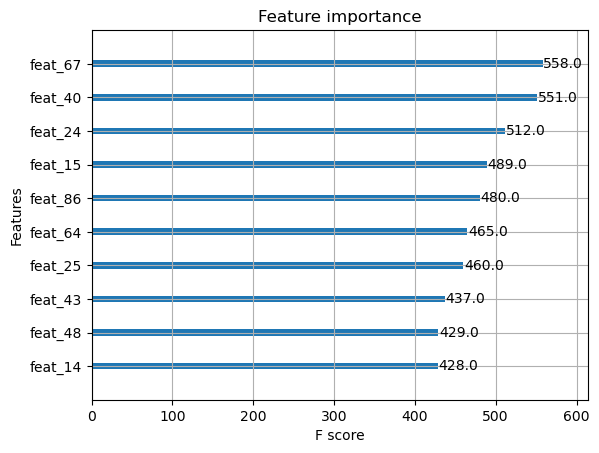

In [27]:
# Feature importance plot
xgb.plot_importance(bst, max_num_features=10)
plt.show()

   Tree  Node   ID  Feature  Split  Yes   No Missing        Gain        Cover  \
0     0     0  0-0  feat_17    2.0  0-1  0-2     0-2  254.662842  9778.172850   
1     0     1  0-1  feat_30   26.0  0-3  0-4     0-4  133.611328  9141.531250   
2     0     2  0-2  feat_16    1.0  0-5  0-6     0-6   90.790779   636.641968   
3     0     3  0-3  feat_78    3.0  0-7  0-8     0-8   85.845215  9135.012700   
4     0     4  0-4     Leaf    NaN  NaN  NaN     NaN    1.130542     6.518518   

   Category  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  


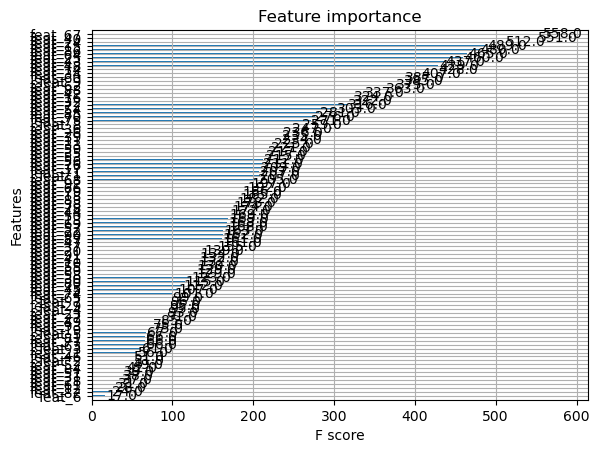

In [31]:
# Get the tree information from the XGBoost model
trees_df = bst.trees_to_dataframe()

# Display a subset of the tree data for the first tree
print(trees_df.head())

# You can also visualize feature importance using a bar plot
xgb.plot_importance(bst)
plt.show()

In [33]:
# Make predictions on the test set
y_pred_test = bst.predict(dtest)

In [35]:
# Prepare the submission file
submission = pd.DataFrame(y_pred_test, columns=[f'Class_{i+1}' for i in range(y_pred_test.shape[1])])
submission['id'] = test.index + 1
submission.to_csv('xgboost_submission.csv', index=False)